# Softmax Prediction in Linear Classifier

In [49]:
import torch
import torch.nn as nn

class LR(nn.Module):
    def __init__(self, in_size, out_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out

In [50]:
torch.manual_seed(1)
model = LR(2, 3)

x = torch.tensor([[1.0, 2.0]])
z = model(x)
_, yhat = z.max(1)
print("Maximum value is in the index: %d" % yhat.numpy())

Maximum value is in the index: 1


## ArgMax Function

In this exemple we have multiple classes, each one represented by a value of $y$. Like logistic regression, the SoftMax function will use lines to classify the data. For example, we have three classes and a one-dimensional feature vector $X$, where $y=0$ is illustred by the blue points, $y=1$ is illustred by the red points, and $y=2$ is illustred by the green points.

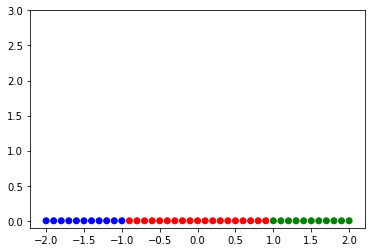

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

X = np.arange(-2, 2.1, 0.1)
X0 = np.arange(-2, -0.9, 0.1)
X1 = np.arange(-0.9, 1, 0.1)
X2 = np.arange(1, 2.1, 0.1)

c0 = ['blue']*X0.shape[0]
c1 = ['red']*X1.shape[0]
c2 = ['green']*X2.shape[0]
colors = c0+c1+c2

yt = [0]*len(colors)
plt.scatter(X, yt, color=colors)
plt.ylim(bottom=-0.1, top=3)
plt.show()

Thus, for every class we have a different line with its own associated parameter $w_0$, $w_1$, $w_2$, and its associated bias term defined as:

$$z_0 = -1.6x - 0.3$$
$$z_1 = 0.1x + 1.3$$
$$z_2 = 1.9x - 0.34$$

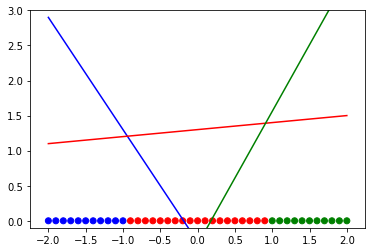

In [41]:
def fz0(X):
    X = np.array(X)
    return -1.6*X - 0.3

def fz1(X):
    X = np.array(X)
    return 0.1*X + 1.3

def fz2(X):
    X = np.array(X)
    return 1.9*X - 0.34

z0 = fz0(X)
z1 = fz1(X)
z2 = fz2(X)
    
plt.plot(X, z0, 'b')
plt.plot(X, z1, 'r')
plt.plot(X, z2, 'g')
plt.scatter(X, yt, color=colors)
plt.ylim(bottom=-0.1, top=3)
plt.show()

Therefore, we have a function for each class (`fz0`, `fz1` and `fz2`). Now we can pick an entry in $X$ and verify what is the answer for each function. To select the class, we check the `argmax` on the results. Let's test the value `-1.5` in all functions.

In [45]:
yhat0 = fz0([-1.5])
yhat1 = fz1([-1.5])
yhat2 = fz2([-1.5])
print("The value for each function is:")
print("z0 = %f" % y0)
print("z1 = %f" % y1)
print("z2 = %f" % y2)

The value for each function is:
z0 = -2.700000
z1 = 1.450000
z2 = 2.510000


Taking the `argmax` of the functions, we select the class `yhat0` (blue) since it has the highest score. Now lets try the value `0.0` as input and verify the result in each function.

In [46]:
yhat0 = fz0([0.0])
yhat1 = fz1([0.0])
yhat2 = fz2([0.0])
print("The value for each function is:")
print("z0 = %f" % y0)
print("z1 = %f" % y1)
print("z2 = %f" % y2)

The value for each function is:
z0 = -2.700000
z1 = 1.450000
z2 = 2.510000


As we can see, the highest value belongs to the class `yhat1` (red). Finally, we verify the result for the value `1.5`.

In [44]:
yhat0 = fz0([1.5])
yhat1 = fz1([1.5])
yhat2 = fz2([1.5])
print("The value for each function is:")
print("z0 = %f" % y0)
print("z1 = %f" % y1)
print("z2 = %f" % y2)

The value for each function is:
z0 = -2.700000
z1 = 1.450000
z2 = 2.510000


As it was expected, the highest value belongs to the `yhat2` (green) class.

# SoftMax Function

Unlike `ArgMax` function that selects the index of the element with the highest value in the output, the `SoftMax` function finds the closest points to the parameter vector. Unlike the `ArgMax` function, the `SoftMax` function is the actual scores are converted into probabilities using the following formula:

$$\sigma(z)_i = \frac{e^{z_j}}{\sum_{k=1}{K} e^{z_k}}\ \ \ \text{for} \ \ j=1, \ldots, K$$

I behaves similar to the threshold function and it is kind of a soft approximation and it gives you a much smoother surface.

# SoftMax in Pytorch

In [53]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

#Load data
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

Processing...
Done!


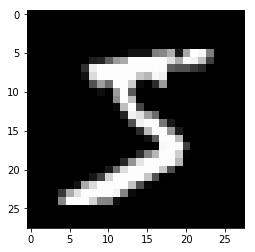

Class of the image: 5


In [63]:
image = train_dataset[0][0].numpy()
plt.imshow(image[0], cmap='gray')
plt.show()
print("Class of the image: %d" % train_dataset[0][1])

As each image of the dataset is a 28x28 matrix, our input dimentsion will be 784 (=28*28) and our output dimension will be 10 since our classes are from 0 to 9.

In [64]:
# create the model
class LR(nn.Module):
    def __init__(self, in_size, out_size):
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out
    
input_dim = 784 
output_dim = 10
model = LR(input_dim, output_dim)

In [65]:
print('W:'),
print(list(model.parameters())[0].size())
print('b:'),
print(list(model.parameters())[1].size())

W: torch.Size([10, 784])
b: torch.Size([10])


In [68]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [69]:
n_epochs = 100
loss_list = []
accuracy_list = []

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [71]:
for epoch in range(n_epochs):
    for x, y in train_loader:
        optimizer.zero_grad()
        z = model(x.view(-1, 28*28))
        loss = criterion(z, y)
        loss.backward()
        optimizer.step()

    correct, N_test = 0, 0
    for x_test, y_test in validation_loader:
        z = model(x_test.view(-1, 28*28))
        _, yhat = torch.max(z.data, 1)
        correct += (yhat == y_test).sum().item()
        N_test += 1
    accuracy = correct/N_test
    accuracy_list.append(accuracy)
    loss_list.append(loss.data)

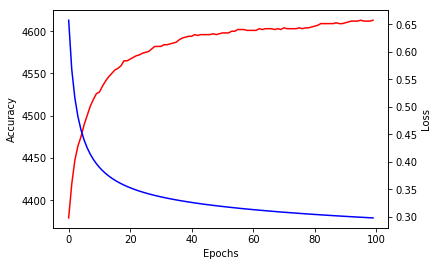

In [80]:
# plot both curves in the same figure
fig = plt.figure()
host = fig.add_subplot(111)
part = host.twinx()

host.set_xlabel("Epochs")
host.set_ylabel("Accuracy")
part.set_ylabel("Loss")

p1, = host.plot(range(len(accuracy_list)), accuracy_list, 'r')
p2, = part.plot(range(len(loss_list)), loss_list, 'b')
plt.show()

<Figure size 1080x216 with 0 Axes>

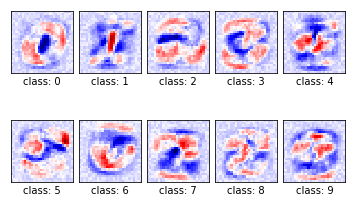

In [76]:
def PlotParameters(model):
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i<10:
            # Set the label for the sub-plot.
            ax.set_xlabel( "class: {0}".format(i))
        # Plot the image.
        ax.imshow(W[i,:].view(28,28), vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    
PlotParameters(model)